In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## data preprocessing

In [250]:
data = pd.read_csv('Enroll_Sort.csv')
data = data.dropna(axis=0)  # drop NaN
data.drop(data.tail(1).index,inplace=True)  # drop last column, which is the same as title, we don't need two
data["Enroll"] = pd.to_numeric(data["Enroll"])  # change enroll into the numeric
data["Evals_Made"] = pd.to_numeric(data["Evals_Made"])  # change evals_made into the numeric
data["Rcmnd_Class"] = pd.to_numeric(data["Rcmnd_Class"].str.split('%', expand=True)[0]).div(100)  # change recommended class into the numeric
data["Rcmnd_Instr"] = pd.to_numeric(data["Rcmnd_Instr"].str.split('%', expand=True)[0]).div(100)  # change recommended Instr into the numeric
data["Study_Hrs_wk"] = pd.to_numeric(data["Study_Hrs_wk"])  # change hour study into the numeric
data['Avg_Grade_Expected'] = pd.to_numeric(data['Avg_Grade_Expected'].str.split('[(|)]', expand=True)[1])  # change avg grade expected into the numeric
data['Avg_Grade_Received'] = pd.to_numeric(data['Avg_Grade_Received'].str.split('[(|)]', expand=True)[1])  # change avg grade received into the numeric
# split course description into course number and name
course_split = data['Course'].str.split('-', n=1, expand=True)
data['course_num'] = course_split[0]
data['course_name'] = course_split[1].str.split('[(|)]', expand=True)[0]
# find same course and combine
find_same_course = data[['Instructor','course_num','course_name']].copy().sort_values(by=['course_num'])
find_same_course.head(20)


,Instructor,course_num,course_name
1776,"Burkhard, Walter A.",CSE 100,Advanced Data Structures
3537,"Alvarado, Christine J.",CSE 100,Advanced Data Structures
3527,"Kube, Paul Richard",CSE 100,Advanced Data Structures
3514,"Kube, Paul Richard",CSE 100,Advanced Data Structures
3513,"Baden, Scott B.",CSE 100,Advanced Data Structures
4279,"Alvarado, Christine J.",CSE 100,Advanced Data Structures
4283,"Porter, Leonard Emerson",CSE 100,Advanced Data Structures
4159,"Cao, Yingjun",CSE 100,Advanced Data Structures
3443,"Bandeira, Nuno Filipe Cabrita",CSE 100,Advanced Data Structures
4325,"Kube, Paul Richard",CSE 100,Advanced Data Structures


In [275]:
data = pd.read_csv('Enroll_Sort.csv')
course_split = data['Course'].str.split('-', n=1, expand=True)
expect_gpa_split = data['Avg_Grade_Expected'].str.split('[(|)]', expand=True)
receive_gpa_split = data['Avg_Grade_Received'].str.split('[(|)]', expand=True)
data['course_num'] = course_split[0].str.split(" ").str.join("")
data['course_name'] = course_split[1]
data['expect_gpa'] = expect_gpa_split[1]
data['receive_gpa'] = receive_gpa_split[1]
dep = course_split[0].str.split(' ', n=1, expand=True)
data['department'] = dep[0]


data.head(10)

,Instructor,Course,Term,Enroll,Evals_Made,Rcmnd_Class,Rcmnd_Instr,Study_Hrs_wk,Avg_Grade_Expected,Avg_Grade_Received,course_num,course_name,expect_gpa,receive_gpa,department
0,"Shacham, Hovav",CSE 127 - Intro/Computer Security (A),WI08,3,5,100.00%,100.00%,10.5,B (3.00),NaN,CSE127,Intro/Computer Security (A),3.00,NaN,CSE
1,"Asbeck, Peter Michael",ECE 139 - SemicndctorDeviceModelng/Desgn (A),SP08,3,3,100.00%,100.00%,7.17,A (4.00),NaN,ECE139,SemicndctorDeviceModelng/Desgn (A),4.00,NaN,ECE
2,"LIU, ZHAOWEI",ECE 185 - Lasers and Modulators (A),SP09,3,3,100.00%,100.00%,3.83,B (3.00),NaN,ECE185,Lasers and Modulators (A),3.00,NaN,ECE
3,"Wang, Wei",CSE 184 - Computational Molecular Biol. (A),WI09,4,8,100.00%,100.00%,11,A- (3.75),NaN,CSE184,Computational Molecular Biol. (A),3.75,NaN,CSE
4,"Kleint, John Timothy",CSE 30 - Computer Organiz&Systms Progrm (A),SU07,4,5,100.00%,100.00%,12.9,B+ (3.40),NaN,CSE30,Computer Organiz&Systms Progrm (A),3.40,NaN,CSE
5,"Lo, Yu-Hwa",ECE 135B - Electronic Devices (A),SP08,4,4,100.00%,100.00%,8,B+ (3.50),NaN,ECE135B,Electronic Devices (A),3.50,NaN,ECE
6,"Lau, Silvanus S",ECE 136L - Microelectronics Laboratory (A),FA10,4,4,100.00%,100.00%,11,B (3.25),NaN,ECE136L,Microelectronics Laboratory (A),3.25,NaN,ECE
7,"Hildebrand, John A",ECE 145CL - Acoustics Laboratory (A),SP09,4,3,100.00%,100.00%,4.5,B+ (3.33),NaN,ECE145CL,Acoustics Laboratory (A),3.33,NaN,ECE
8,"Fullerton, Eric E",ECE 146 - Introductn/Magnetic Recording (A),FA09,4,3,100.00%,100.00%,5.83,B (3.00),NaN,ECE146,Introductn/Magnetic Recording (A),3.00,NaN,ECE
9,"Wolf, Jack K",ECE 155A - Digital Recording Systems (A),FA09,4,4,75.00%,100.00%,5.5,A- (3.75),NaN,ECE155A,Digital Recording Systems (A),3.75,NaN,ECE


Split by department

In [276]:
ece = data.loc[data['department'] == 'ECE']
cse = data.loc[data['department'] == 'CSE']
mae = data.loc[data['department'] == 'MAE']

In [189]:
tmp = data.size
print(tmp)

66825


In [190]:
data = data.dropna(axis=0)

In [191]:
data.size

53925

### people enroll

#### ECE

Text(0.5, 1.0, 'ECE top enroll courses')

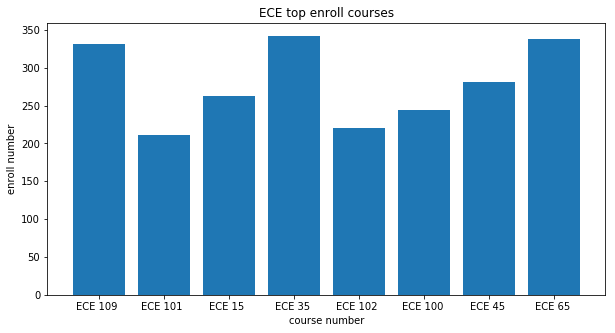

In [5]:
popular_class = ece.loc[ece['Enroll'].astype(int) > 200]
x = popular_class['course_num'].values.tolist()
h = popular_class['Enroll'].astype(int).values.tolist()
#print(popular_class)
plt.figure(figsize=(10,5))
plt.bar(x,h)
plt.xlabel('course number')
plt.ylabel('enroll number')
plt.title("ECE top enroll courses")

#### CSE

Text(0.5, 1.0, 'CSE top enroll courses')

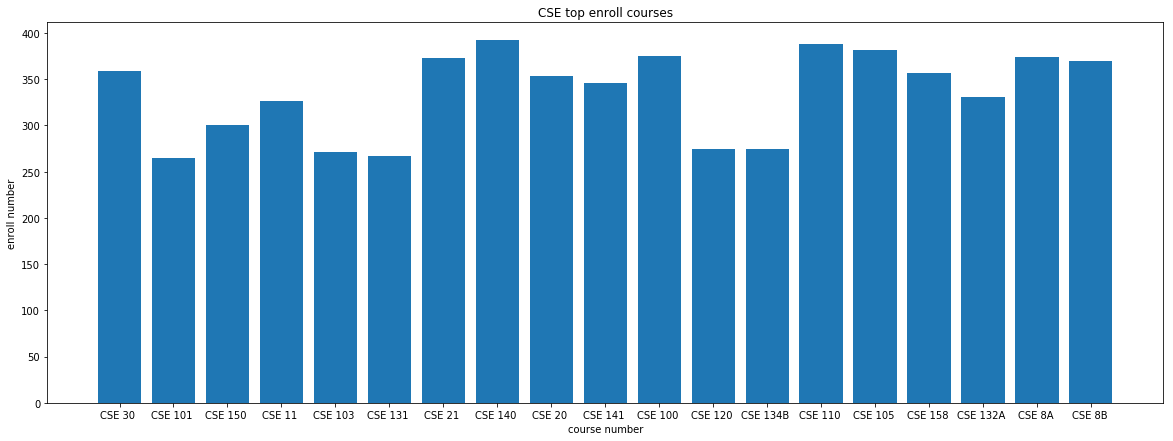

In [11]:
popular_class = cse.loc[cse['Enroll'].astype(int) > 250]
x = popular_class['course_num'].values.tolist()
h = popular_class['Enroll'].astype(int).values.tolist()
#print(popular_class)
plt.figure(figsize=(20,7))
plt.bar(x,h)
plt.xlabel('course number')
plt.ylabel('enroll number')
plt.title("CSE top enroll courses")

Text(0.5, 1.0, 'CSE top enroll courses')

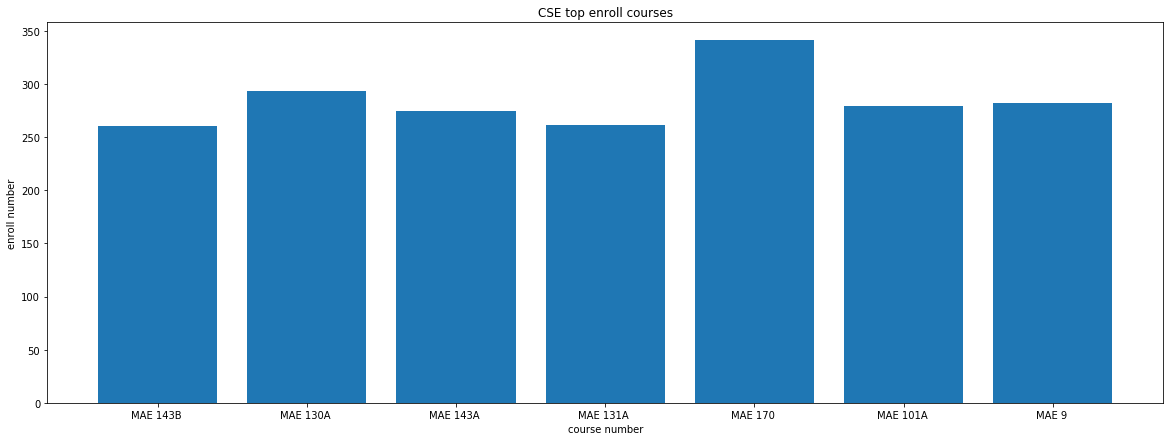

In [12]:
popular_class = mae.loc[mae['Enroll'].astype(int) > 250]
x = popular_class['course_num'].values.tolist()
h = popular_class['Enroll'].astype(int).values.tolist()
#print(popular_class)
plt.figure(figsize=(20,7))
plt.bar(x,h)
plt.xlabel('course number')
plt.ylabel('enroll number')
plt.title("CSE top enroll courses")

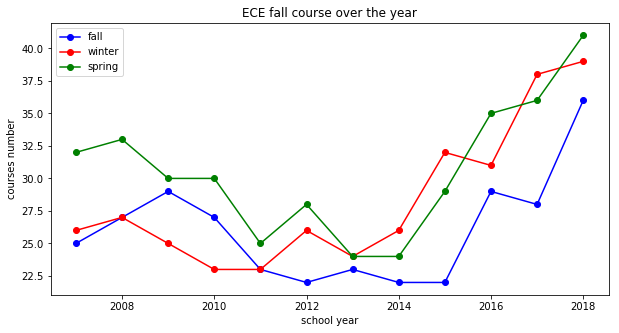

In [129]:
term_count = ece.groupby('Term', as_index=False)['Course'].count()
term_count = term_count.rename(columns={"Course":"count"})
ece_fall = term_count.loc[term_count['Term'].str.startswith('FA')].values
ece_winter = term_count.loc[term_count['Term'].str.startswith('WI')].values
ece_spring = term_count.loc[term_count['Term'].str.startswith('SP')].values
school_year = [i for i in range(2007,2019)]
plt.figure(figsize=(10,5))
plt.plot(school_year,ece_fall[:,1],'-bo',label='fall')
plt.plot(school_year,ece_winter[:,1],'-ro',label='winter')
plt.plot(school_year,ece_spring[:,1],'-go',label='spring')
plt.title('ECE fall course over the year')
plt.xlabel('school year')
plt.ylabel('courses number')
plt.legend()
plt.show()

study hour mean

In [192]:
ece_study_hour = ece.groupby('course_num', as_index=False)['Study_Hrs_wk']
#ece_study_hour.astype({'Study_Hrs_wk': 'float64'})
print(type(ece_study_hour))


<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


In [280]:
cse_100 = cse.loc[cse['Instructor'] == 'Alvarado, Christine J.']
cse_100 = cse_100.loc[cse['course_num'] == 'CSE100']
print(cse_100)
#print('CSE 100')
            

                  Instructor                                  Course  Term  \
3343  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (B)  FA16   
3537  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (B)  WI16   
3618  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (B)  WI19   
4191  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (A)  SP16   
4202  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (A)  FA16   
4213  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (B)  SP16   
4229  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (B)  WI15   
4279  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (A)  FA13   
4336  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (A)  WI17   
4338  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (B)  WI17   
4402  Alvarado, Christine J.  CSE 100 - Advanced Data Structures (A)  WI19   
4416  Alvarado, Christine J.  CSE 100 - Advanced Data Structures